<a href="https://colab.research.google.com/github/Nolanole/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/Josh_Mancuso_DS3_Repl_Code_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions from your teacher:
This morning we will get some Pandas Practice!

Task: 
https://raw.githubusercontent.com/pierretd/datasets-1/master/BlackFriday.csv


The above dataset has been loaded in for you, answer the following questions. (use Colab if Pandas gives you issues and drop a link to your notebook as a comment)

If you worked on this previously, you can move onto the stretch and super stretch goals. Work on improving your model until 10:40. 

1) Clean the data set and drop the Null/NaN values. Rename  Product_Category_1-3 columns with an actual Product. 

2) How many unique user_ids does the data set contain?

3) How many unique age brackets are in the dataset. Which Age bracket has the most entries? Which has the least?

4) Transform the Gender categorical variable into a numerical variable. Then transform that numerical value into a Boolean.

5)What is the average Occupation score? What is the Standard Deviation? What is the maximum and minimum value?

7) Group Age by Gender and print out a cross tab with age as the y axis



In [15]:
import pandas as pd
from matplotlib import pyplot as plt

black_friday_csv_link = "https://raw.githubusercontent.com/pierretd/datasets-1/master/BlackFriday.csv"

df = pd.read_csv(black_friday_csv_link)

print(df.head())

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN   

In [16]:
#1) Clean the data set and drop the Null/NaN values. Rename Product_Category_1-3 columns with an actual Product.

df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [17]:
df = df.dropna()

df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [18]:
cols = {'Product_Category_1': 'shoes', 'Product_Category_2': 'socks', 'Product_Category_3': 'jeans'}
df = df.rename(columns=cols)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,shoes,socks,jeans,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055


In [19]:
#2) How many unique user_ids does the data set contain?

df.User_ID.nunique()

5868

In [20]:
#3) How many unique age brackets are in the dataset. Which Age bracket has the most entries? Which has the least?

df.Age.nunique()

7

In [21]:
df.Age.value_counts()

26-35    65916
36-45    32758
18-25    30889
46-50    13135
51-55    11018
55+       5773
0-17      4789
Name: Age, dtype: int64

In [22]:
#4) Transform the Gender categorical variable into a numerical variable. Then transform that numerical value into a Boolean.

df.Gender = df.Gender.replace({'F' : 0, 'M': 1})
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,shoes,socks,jeans,Purchase
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,1,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,1,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,0,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,0,51-55,9,A,1,0,2,3.0,4.0,13055


In [0]:
df['is_male'] = df.Gender.astype(bool)

In [24]:
df.is_male.head()

1     False
6      True
13     True
14    False
16    False
Name: is_male, dtype: bool

In [25]:
#5) What is the average Occupation score? What is the Standard Deviation? What is the maximum and minimum value?

df.Occupation.describe()

count    164278.000000
mean          8.180383
std           6.486705
min           0.000000
25%           2.000000
50%           7.000000
75%          14.000000
max          20.000000
Name: Occupation, dtype: float64

In [31]:
#7) Group Age by Gender and print out a cross tab with age as the y axis

age_gender_ct = pd.crosstab(df['Age'], df['Gender'])

age_gender_ct


Gender,0,1
Age,,
0-17,1552,3237
18-25,6970,23919
26-35,13364,52552
36-45,7728,25030
46-50,3572,9563
51-55,2479,8539
55+,1267,4506


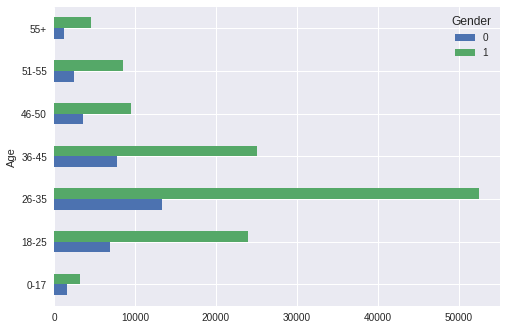

In [33]:
age_gender_ct.plot(kind='barh');